In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.insert(0, '../scripts/')

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from fast_ml import eda
%matplotlib inline

In [5]:
root_dir = Path().cwd().parent
data_dir = root_dir / "data"

In [51]:
df = pd.read_csv(data_dir / "data.csv")

In [52]:
df.drop(columns="Unnamed: 32", axis=1, inplace=True)

In [53]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
df.shape

(569, 32)

In [10]:
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
421,906564,B,14.69,13.98,98.22,656.1,0.10310,0.1836,0.14500,0.06300,...,16.46,18.34,114.1,809.2,0.1312,0.3635,0.3219,0.1108,0.2827,0.09208
244,884180,M,19.40,23.50,129.10,1155.0,0.10270,0.1558,0.20490,0.08886,...,21.65,30.53,144.9,1417.0,0.1463,0.2968,0.3458,0.1564,0.2920,0.07614
148,86973702,B,14.44,15.18,93.97,640.1,0.09970,0.1021,0.08487,0.05532,...,15.85,19.85,108.6,766.9,0.1316,0.2735,0.3103,0.1599,0.2691,0.07683
65,859283,M,14.78,23.94,97.40,668.3,0.11720,0.1479,0.12670,0.09029,...,17.31,33.39,114.6,925.1,0.1648,0.3416,0.3024,0.1614,0.3321,0.08911
236,88299702,M,23.21,26.97,153.50,1670.0,0.09509,0.1682,0.19500,0.12370,...,31.01,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677


In [11]:
plt.style.use("seaborn")

In [18]:
summary_df = eda.df_info(df)

In [19]:
summary_df

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
id,int64,Numerical,569,"[842302, 842517, 84300903, 84348301, 84358402,...",0,0.0
diagnosis,object,Categorical,2,"[M, B]",0,0.0
radius_mean,float64,Numerical,456,"[17.99, 20.57, 19.69, 11.42, 20.29, 12.45, 18....",0,0.0
texture_mean,float64,Numerical,479,"[10.38, 17.77, 21.25, 20.38, 14.34, 15.7, 19.9...",0,0.0
perimeter_mean,float64,Numerical,522,"[122.8, 132.9, 130.0, 77.58, 135.1, 82.57, 119...",0,0.0
area_mean,float64,Numerical,539,"[1001.0, 1326.0, 1203.0, 386.1, 1297.0, 477.1,...",0,0.0
smoothness_mean,float64,Numerical,474,"[0.1184, 0.08474, 0.1096, 0.1425, 0.1003, 0.12...",0,0.0
compactness_mean,float64,Numerical,537,"[0.2776, 0.07864, 0.1599, 0.2839, 0.1328, 0.17...",0,0.0
concavity_mean,float64,Numerical,537,"[0.3001, 0.0869, 0.1974, 0.2414, 0.198, 0.1578...",0,0.0
concave points_mean,float64,Numerical,542,"[0.1471, 0.07017, 0.1279, 0.1052, 0.1043, 0.08...",0,0.0


**1. Plot for radius_mean**

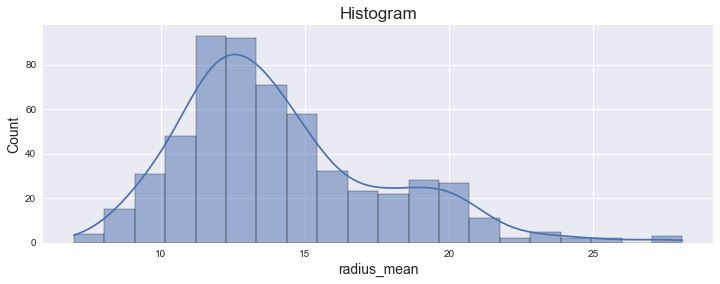

**2. Plot for area_mean**

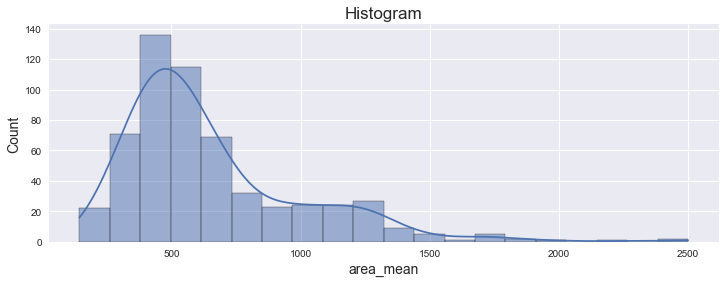

In [21]:
eda.numerical_plots(df, ["radius_mean", "area_mean"])

In [24]:
from fast_ml.outlier_treatment import OutlierTreatment

In [50]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]
    return df_final

<AxesSubplot:xlabel='radius_mean'>

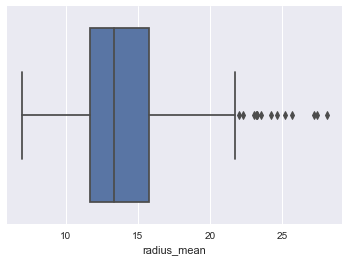

In [57]:
sns.boxplot(data=df, x="radius_mean")

In [41]:
treated_df = OutlierTreatment(method="iqr").fit(df).transform(df)

<AxesSubplot:xlabel='radius_mean'>

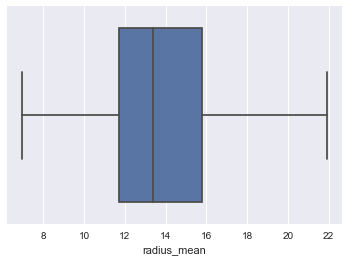

In [42]:
sns.boxplot(data=treated_df, x="radius_mean")